In [19]:
import sys
from matplotlib import pyplot as plt
import pathlib
import os.path

# explicit import  
sys.path.append("./PyBaSiC/")
import pybasic

In [20]:
GFP_path = '/home/jenna/NF1_SchwannCell_data/1.preprocessing_data/PyBaSiC_Pipelines/NF1_Channels/GFP/'

image_names = [fpath.split(".")[0] for fpath in os.listdir(GFP_path)]
GFP_images = pybasic.tools.load_data(GFP_path, '.tif', verbosity = True)


0 / 32
10 / 32
20 / 32
30 / 32


In [21]:
flatfield, darkfield = pybasic.basic(GFP_images, darkfield=True)

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5
reweighting_iter: 6
reweighting_iter: 7


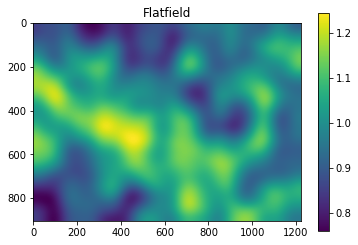

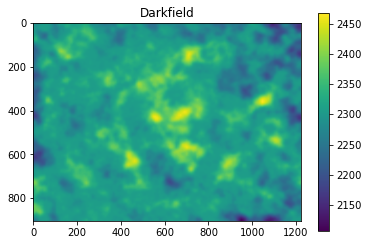

In [22]:
plt.title('Flatfield')
plt.imshow(flatfield)
plt.colorbar()
plt.show()
plt.title('Darkfield')
plt.imshow(darkfield)
plt.colorbar()
plt.show()

In [23]:
GFP_images_corrected = pybasic.correct_illumination(
    images_list = GFP_images, 
    flatfield = flatfield, 
    darkfield = darkfield,
)

corr_images = zip(image_names, GFP_images_corrected)

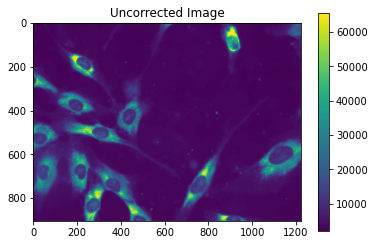

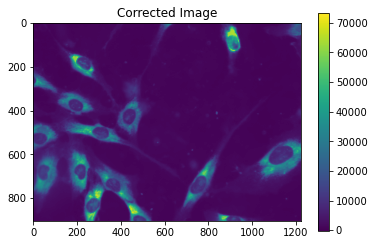

In [24]:
i = 15
plt.title('Uncorrected Image')
plt.imshow(GFP_images[i])
plt.colorbar()
plt.show()
plt.title('Corrected Image')
plt.imshow(GFP_images_corrected[i])
plt.colorbar()
plt.show()

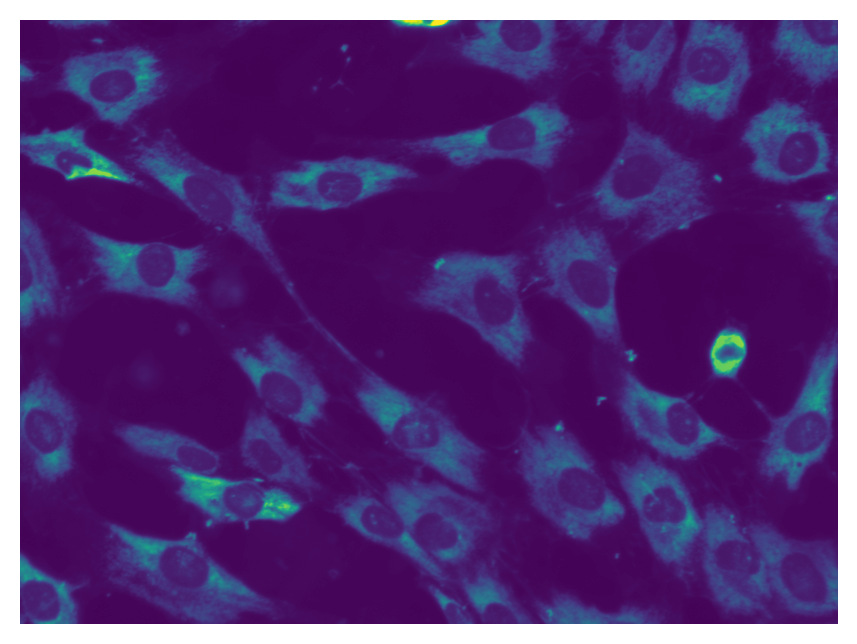

In [25]:
fig = plt.figure(dpi=200)

for fname, images in corr_images:
    name = f"../NF1_Channels/GFP_Corrected/{fname}_IllumCorrected.tif"
    plt.imshow(images)
    plt.axis('off')
    plt.savefig(name)